**G2M insight for Cab Investment firm**

**Business Problem:**

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

**Import Libraries**

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [71]:
cab_df = pd.read_csv('/content/sample_data/datasets/Cab_Data.csv')
city_df = pd.read_csv('/content/sample_data/datasets/City.csv')
cust_df = pd.read_csv('/content/sample_data/datasets/Customer_ID.csv')
tran_df = pd.read_csv('/content/sample_data/datasets/Transaction_ID.csv')

**Cab DataFrame**

In [72]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [73]:
print("Number of rows: ", cab_df.shape[0])
print("Number of columns: ", cab_df.shape[1])

Number of rows:  359392
Number of columns:  7


In [74]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [75]:
cab_df.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [76]:
cab_df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


**City DataFrame**

In [77]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [78]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [79]:
city_df['Population'] = [x.replace(',','') for x in city_df['Population']]
city_df['Population'] = city_df['Population'].astype(float)

city_df['Users'] = [x.replace(',','') for x in city_df['Users']]
city_df['Users'] = city_df['Users'].astype(float)

In [80]:
city_df.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [81]:
city_df.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


**Transaction ID DataFrame**

In [82]:
tran_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [83]:
tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [84]:
tran_df.describe(include = 'all', datetime_is_numeric=True)

,Transaction ID,Customer ID,Payment_Mode
count,4.400980e+05,440098.000000,440098
unique,NaN,NaN,2
top,NaN,NaN,Card
freq,NaN,NaN,263991
mean,1.022006e+07,23619.513120,NaN
std,1.270455e+05,21195.549816,NaN
min,1.000001e+07,1.000000,NaN
25%,1.011004e+07,3530.000000,NaN
50%,1.022006e+07,15168.000000,NaN
75%,1.033008e+07,43884.000000,NaN


**Customer ID DataFrame**

In [85]:
cust_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [86]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [87]:
cust_df.describe( include = 'all')

,Customer ID,Gender,Age,Income (USD/Month)
count,49171.000000,49171,49171.000000,49171.000000
unique,NaN,2,NaN,NaN
top,NaN,Male,NaN,NaN
freq,NaN,26562,NaN,NaN
mean,28398.252283,NaN,35.363121,15015.631856
std,17714.137333,NaN,12.599066,8002.208253
min,1.000000,NaN,18.000000,2000.000000
25%,12654.500000,NaN,25.000000,8289.500000
50%,27631.000000,NaN,33.000000,14656.000000
75%,43284.500000,NaN,42.000000,21035.000000


**EDA**

In [88]:
df= cab_df.merge(tran_df, on= 'Transaction ID').merge(cust_df, on ='Customer ID').merge(city_df, on = 'City')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0


In [89]:
df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  float64
 13  Users               359392 non-null  float64
dtypes: float64(5), int64(5), object(4)
memory usage: 41.1+ MB


In [91]:
df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000


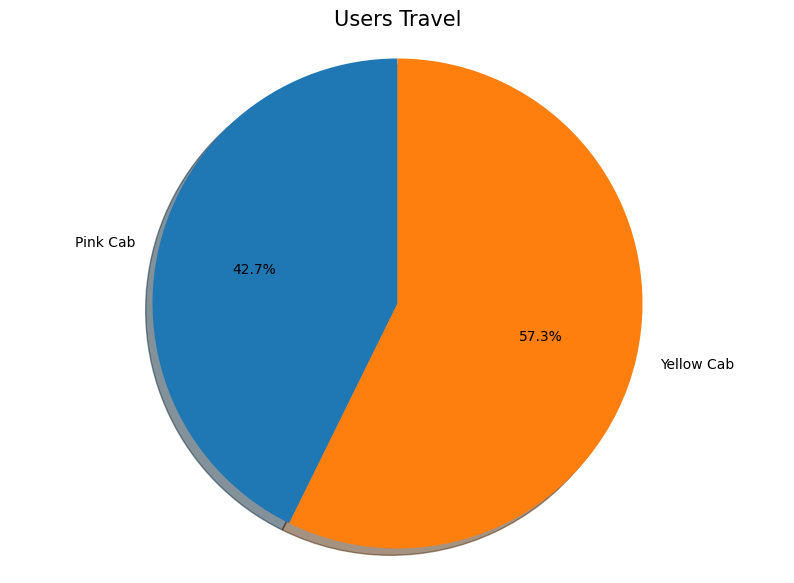

In [97]:
user=df.groupby('Company')
avg_user = user.Users.mean()
index = avg_user.index
value = avg_user.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(value , labels=index, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Users Travel', fontsize = 15)
plt.show()

In [98]:
cat_col = ['Company', 'City', 'Payment_Mode', 'Gender']
for name in cat_col:
    print(f"*************{name}****************")
    print("TOTAL: ", df[name].count())
    print(df[name].value_counts())
print("##############END###############")

*************Company****************
TOTAL:  359392
Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64
*************City****************
TOTAL:  359392
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64
*************Payment_Mode****************
TOTAL:  359392
Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64
*************Gender****************
TOTAL:  359392
Male      205912
Female    153480
Name: Gender, dtype: int64
##############END###############


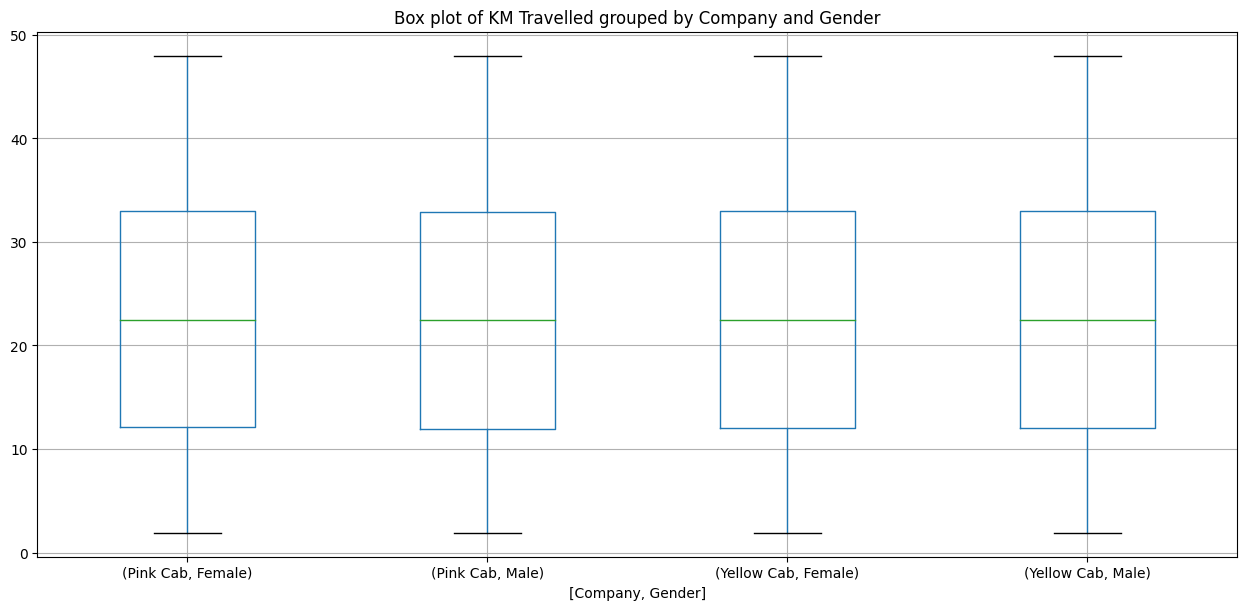

In [99]:
df.boxplot(column='KM Travelled', by=['Company', 'Gender'], figsize=(15, 7))
plt.title('Box plot of KM Travelled grouped by Company and Gender')
plt.suptitle("")
plt.show()

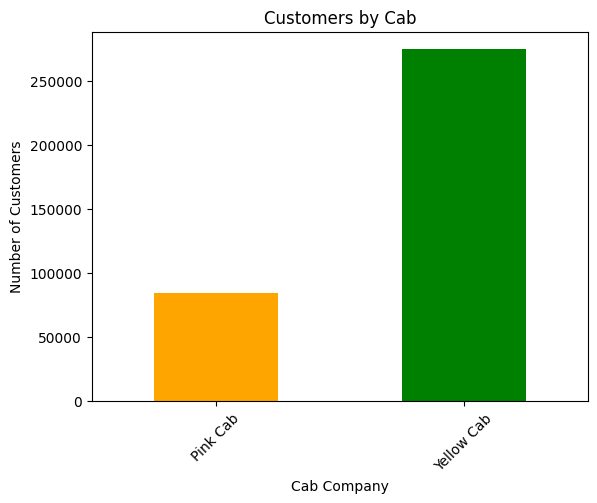

In [100]:
df['Company'].value_counts(ascending=True).plot(kind='bar', color=['orange', 'green'], rot=45)
plt.xlabel('Cab Company')
plt.ylabel('Number of Customers')
plt.title('Customers by Cab')
plt.show()

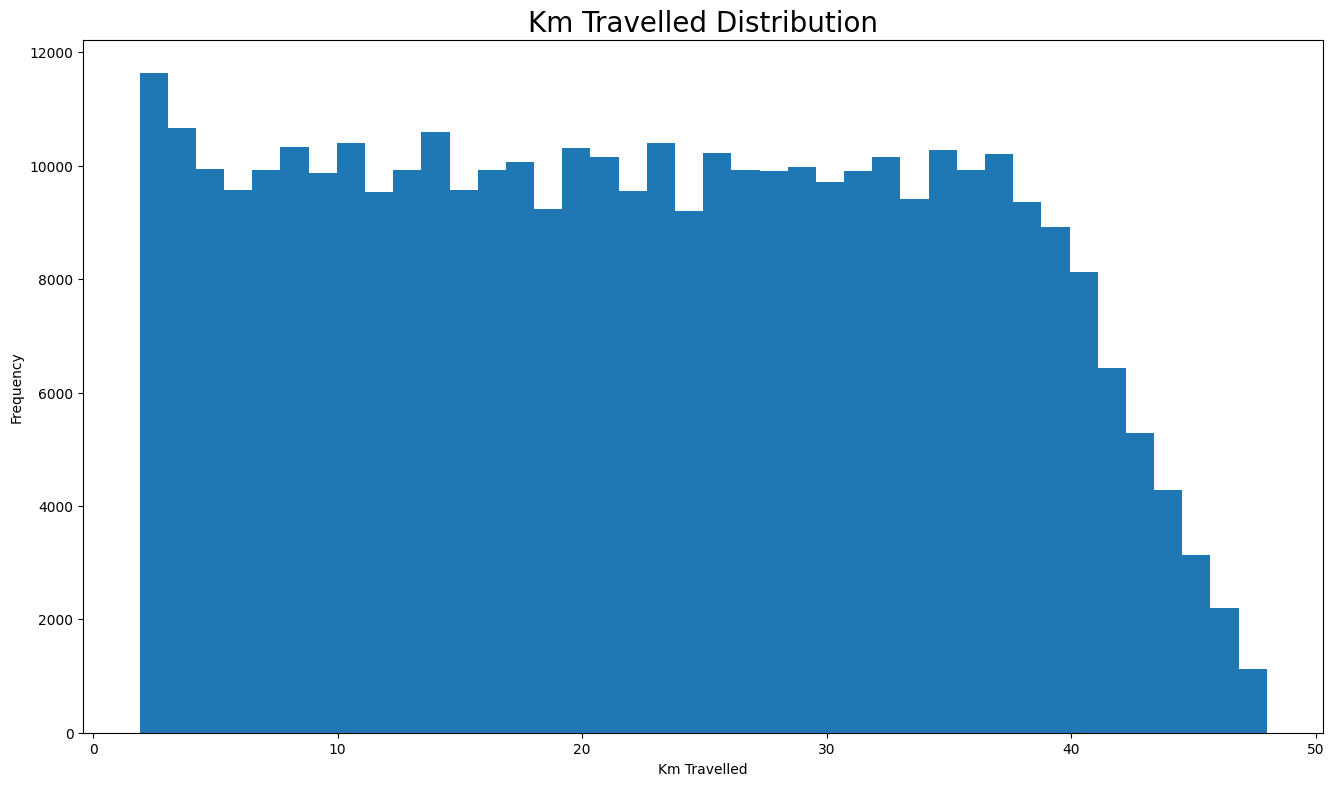

In [107]:
plt.figure(figsize = (16, 9))
plt.hist(df['KM Travelled'], bins = 40)
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')
plt.show()

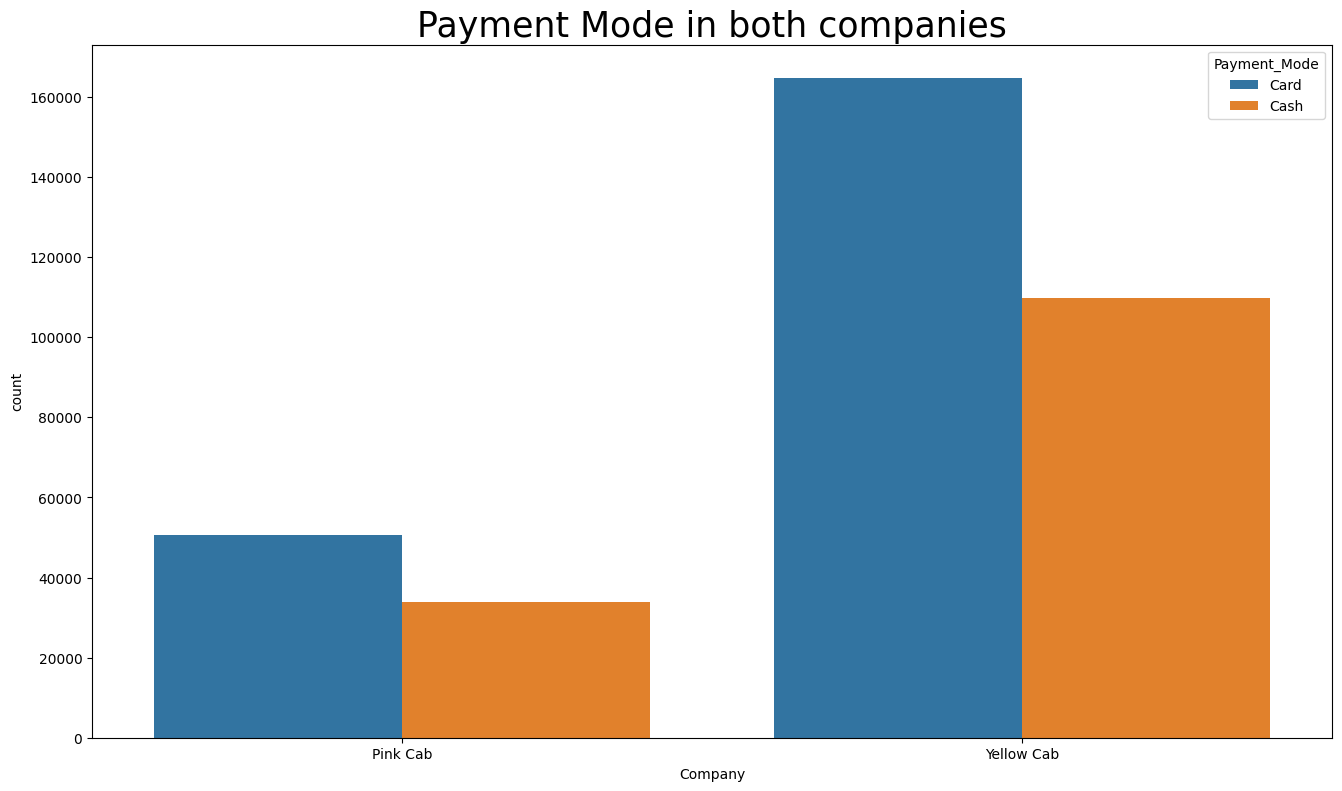

In [108]:
plt.figure(figsize = (16, 9))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=df)
plt.title('Payment Mode in both companies', fontsize=25)
plt.show()

In [109]:
gender_cab=df.groupby(['Company','Gender'])
gender_cab  = gender_cab['Customer ID'].nunique()
print(gender_cab)

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64


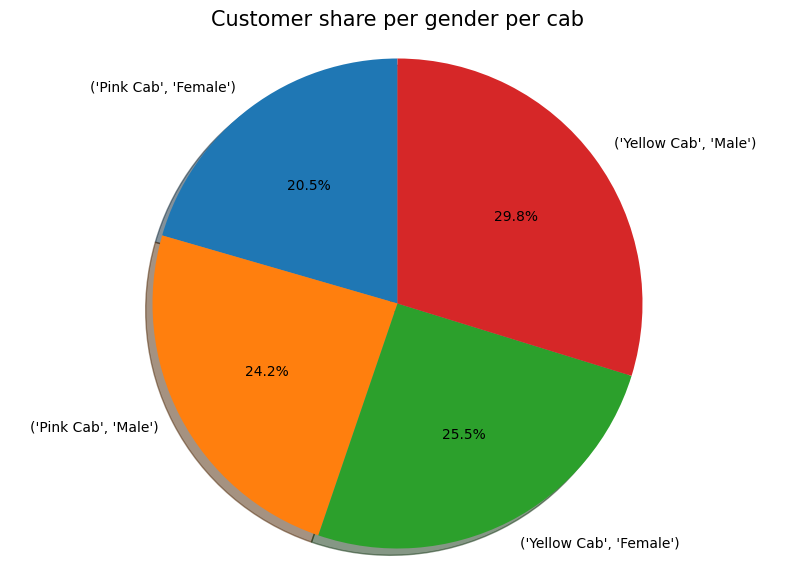

In [110]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab', fontsize = 15)
plt.show()

**Hypothesis**

The above Exploratory Data Analysis (EDA) finds various dynamics of the data of two cab companies: Pink Cab and Yellow Cab. We found that there are no null values in the master dataframe. Yellow Cab is seen having more profit than the Pink Cab. Yellow cab is preferred by the users over pink cab. However the profit of yellow cab is decreasing over the years whereas the pink cab's profit is increasing. It's been seen that January and December is having the maximum number of travels and it's obvious because these months are generally holidays month. In summary yellow cab would be the preferred one to invest in. There is no difference in payment mode for both cab companies.